# Interpolation polynomiale - Étude du phénomène de Runge

### Importation de packages pour Python

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl

## Retour sur le phénomène de Runge

On a vu dans le cours le phénomène de Runge qui se traduit par une mauvaise interpolation, lorsque l'on augmente le degré du polynôme d'interpolation de Lagrange, de la fonction $f$ définie sur $\mathbb{R}$ par
$$
f(x) = \dfrac{1}{1+x^2}.
$$
Le but du TP est d'observer ce phénomène mais aussi de mettre en oeuvre une meilleure répartition des points d'interpolation à l'aide des racines des polynômes de Chebyshev et de constater l'atténuation du phénomène de Runge. Plus particulièrement, vous implémenterez des fonctions permettant de calculer le polynôme d'interpolation de Lagrange par la méthode directe, celle de Lagrange et celle de Newton. On verra l'intérêt d'utiliser la méthode de Newton lorsque l'on désire ajouter un point d'interpolation.

### Fonction de Runge

>**À faire :** Implémenter une fonction **Runge** qui à chaque un vecteur $x$ sous format numpy retourne le vecteur $f(x)$. Puis, tracer de cette fonction sur l'intervalle $[-3,3]$.

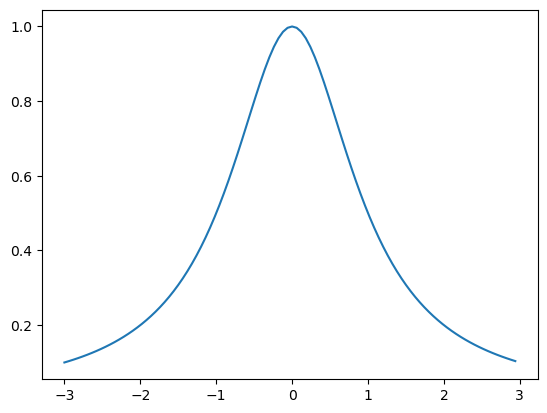

In [6]:
def Runge(x):
    return 1./(1+np.power(x,2))
x = np.arange(-3,3, 6/100)
plt.plot(x,Runge(x))

### Construction de points d'interpolation équirépartis

Dans un premier temps, nous allons considérer des points d'interpolation uniformément répartis sur l'intervalle d'interpolation $[a,b]$, $a<b$. L'ensemble des points d'interpolation $(x_j)_{0\leq j\leq n}$ va donc être donné, pour un certain $n\geq 1$, par
$$ x_j = a + (b-a)\frac j n, \quad 0\leq j\leq n.$$


>**À faire :** Implémenter une fonction **Interp_Equi** qui prend en arguments d'entrée les valeurs $a$ et $b$ (qui définissent l'intervalle d'interpolation) ainsi que $m$ de manière à retourner un vecteur $x$ de $m$ points d'interpolations équirépartis sur $[a,b]$. 

In [7]:
def Interp_Equi(a,b,m):
    x = np.array([])
    for i in range(m):
        x = np.append(x,a+(b-a)*i/(m-1))
    return x
print(Interp_Equi(-3,3,10))

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]


### Méthode directe de construction d'un polynôme d'interpolation

On rappelle que la méthode directe de construction consiste à simplement poser le système d'équations suivant
$$ p(x_j) = y_j, \quad 0\leq j\leq n,$$
sous la forme d'un système linéaire dont la solution correspond au vecteur $(a_j)_{0\leq j\leq n}$ de coefficients du polynôme d'interpolation. Plus précisément, le système s'écrit
$$ \left[ 
\begin{array}{ccccc}
1 & x_0 & \cdots & x_0^{n-1} & x_0^n \\ 
1  & x_1 & \cdots & x_1^{n-1}  & x_1^n \\ 
\vdots & \vdots &  & & \vdots \\ 
1 & x_n & \cdots & x_{n}^{n-1} & x_{n}^n
\end{array}
\right]\left[\begin{array}{c}a_0\\ a_1\\ \vdots \\ a_n \end{array}\right] = \left[\begin{array}{c}y_0\\ y_1\\ \vdots \\ y_n \end{array}\right].
 $$
 
 >**À faire :** Implémenter une fonction **Vandermonde** qui prend en arguments d'entrée un vecteur $x$ de points d'interpolation et qui rend, en sortie, la matrice de Vandermonde associée au système linéaire précédent. 

In [8]:
def Vandermonde(x):
    M = np.zeros((x.size, x.size))
    for i in range(x.size):
        for j in range(x.size):
            M[i][j] = np.power(x[i],j)
    return M
Vandermonde(Interp_Equi(-3,3,10))

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01,  8.10000000e+01, -2.43000000e+02,
         7.29000000e+02, -2.18700000e+03,  6.56100000e+03,
        -1.96830000e+04],
       [ 1.00000000e+00, -2.33333333e+00,  5.44444444e+00,
        -1.27037037e+01,  2.96419753e+01, -6.91646091e+01,
         1.61384088e+02, -3.76562872e+02,  8.78646700e+02,
        -2.05017563e+03],
       [ 1.00000000e+00, -1.66666667e+00,  2.77777778e+00,
        -4.62962963e+00,  7.71604938e+00, -1.28600823e+01,
         2.14334705e+01, -3.57224508e+01,  5.95374181e+01,
        -9.92290301e+01],
       [ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
         1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00],
       [ 1.00000000e+00, -3.33333333e-01,  1.11111111e-01,
        -3.70370370e-02,  1.23456790e-02, -4.11522634e-03,
         1.37174211e-03, -4.57247371e-04,  1.52415790e-04,
        -5.

 >**À faire :** À l'aide de la fonction **npl.solve**, implémenter une fonction **Methode_directe** qui prend en argument les points d'interpolations $x$ ainsi qu'une fonction $f$ à interpoler et qui rend en sortie un vecteur $a$ qui contient les coefficients du polynôme d'interpolation de $f$ aux points $x$.

In [9]:
def f(x):
    return 1./(1+x**2)

def Methode_directe(x,f):
    return npl.solve(Vandermonde(x), f(x))

print(Methode_directe(Interp_Equi(-3,3,10),Runge))

[ 9.72046146e-01  9.03633957e-17 -6.74203854e-01 -2.71923248e-16
  2.36044625e-01  4.31346500e-16 -3.57352941e-02 -1.22640117e-16
  1.84837728e-03  8.66064998e-18]


 >**À faire :** Grâce aux fonctions **PtsInterp_Equi** et **Methode_directe**, tracer sur une même figure la fonction **Runge** sur l'intervalle $[-3,3]$ ainsi que son polynôme d'interpolation pour $5$, $10$ et $15$ points d'interpolation.

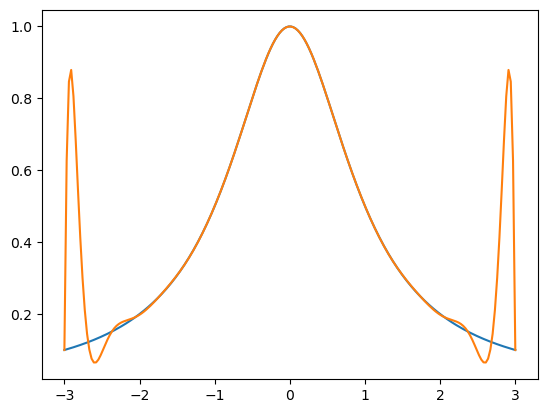

In [10]:
def eval_poly(coeff,x):
    res = 0
    for i in range(coeff.size):
        res += coeff[i]*np.power(x,i)
    return res
    
nbpt = 20
x = Interp_Equi(-3,3,nbpt)
x_prec = Interp_Equi(-3,3,nbpt*10)
p = Methode_directe(x,Runge)
plt.plot(x_prec, Runge(x_prec))
plt.plot(x_prec, eval_poly(p,x_prec))

### Méthode de Lagrange

Nous avons vu dans le cours que le polynôme d'interpolation de Lagrange peut être calculé par la méthode de Lagrange. Cette méthode consiste à trouver une base de polynômes, qui sont les polynômes de Lagrange, dans laquelle on exprime le polynôme d'interpolation. Étant donné une fonction $f$ et un ensemble $(x_j)_{0\leq j\leq n}$ de points d'interpolation, le polynôme d'interpolation $p$ s'exprime comme
$$
p(x) = \sum_{j = 0}^{n} f(x_j) L_{j,n}(x), \quad \forall x \in \mathbb{R},
$$
avec $(L_{j,n})_{0\leq j\leq n}$ la base de polynôme de Lagrange donnée par
$$
L_{j,n}(x) = \prod_{\substack{k = 0\\k\neq j}}^{n} \dfrac{x-x_k}{x_j-x_k}.
$$

 >**À faire :** Écrire une fonction **Methode_Lagrange** qui implémente la méthode précédente avec en arguments d'entrée un vecteur $x\_interp$ de points d'interpolation et un vecteur $x$ de points d'abscisse. Cette fonction returnera la matrice $L$ dont chaque colonne correspond au vecteur $\ell_i = L_{i,n}(x)$. 
 
On obtient alors le vecteur  $y = p(x)$ grâce au produit matrice-vecteur $y = Lz$ où $z = f(x\_interp)$. Le produit matrice-vecteur peut se faire grâce à la fonction **np.dot**.

In [65]:
def Methode_Lagrange(x_interp,x):
    if x_interp.size > x.size :
        raise Exception("x_interp has to be shorter than x")
        
    L = np.zeros((x_interp.size,x.size))
    for j in range(x_interp.size):
        produit = np.ones(x.size)
        for k in range(x_interp.size):
                if k != j:
                    produit *= (x-x_interp[k])/(x_interp[j] - x_interp[k])
        L[j] = produit
    return np.transpose(L)

def p(x_interp,x, f):
    return np.dot(Methode_Lagrange(x_interp,x), f(x_interp))

print(Methode_Lagrange(Interp_Equi(-3,3,10), Interp_Equi(-3,3,10)))
z = f(Interp_Equi(-3,3,10))
y = 0

[[ 1.  0. -0.  0. -0.  0. -0.  0. -0.  0.]
 [-0.  1.  0. -0.  0. -0.  0. -0.  0. -0.]
 [ 0. -0.  1.  0. -0.  0. -0.  0. -0.  0.]
 [-0.  0. -0.  1.  0. -0.  0. -0.  0. -0.]
 [ 0. -0.  0. -0.  1.  0. -0.  0. -0.  0.]
 [-0.  0. -0.  0. -0.  1.  0. -0.  0. -0.]
 [ 0. -0.  0. -0.  0. -0.  1.  0. -0.  0.]
 [-0.  0. -0.  0. -0.  0. -0.  1.  0. -0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  1.  0.]
 [-0.  0. -0.  0. -0.  0. -0.  0. -0.  1.]]


 >**À faire :** Tracer ensuite sur une même figure la fonction **Runge** sur l'intervalle $[-3,3]$ ainsi que son polynôme d'interpolation obtenue avec la méthode de Lagrange pour $5$, $10$ et $15$ points d'interpolation.

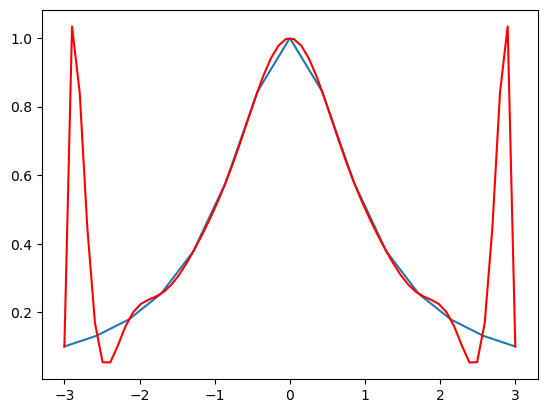

In [66]:
x = Interp_Equi(-3,3, 60)
x_interp = Interp_Equi(-3,3,15)
plt.plot(x_interp, Runge(x_interp))
plt.plot(x, p(x_interp,x, Runge), color='red')

### Méthode de Newton

La méthode de Newton, comme pour celle de Lagrange, permet d'exprimer le polynôme d'interpolation de Lagrange dans une base de polynômes, qui sont les polynômes de Newton. Étant donné une fonction $f$ et un ensemble $(x_j)_{0\leq j\leq n}$ de points d'interpolation, le polynôme d'interpolation $p$ s'exprime comme
$$
p(x) = \sum_{j = 0}^{n} z_j N_{j,n}(x), \quad \forall x \in \mathbb{R},
$$
avec $(N_{j,n})_{0\leq j\leq n}$ la base de polynôme de Newton donnée par
$$
N_{j,n}(x) = \prod_{k = 0}^{j} (x-x_k),
$$
et $(z_j)_{0\leq j\leq n}$ les coefficients qui sont solution du système triangulaire
$$
\left[ 
\begin{array}{cccccc}
1 & 0 & 0  &  \cdots & 0 \\ 
1  & (x_1-x_0) & 0  & \cdots   & 0 \\ 
1  & (x_2-x_0) & (x_2-x_0)(x_2-x_1) & \ddots   & \vdots \\ 
\vdots & \vdots &  \vdots  & \ddots & 0 \\ 
1 & (x_n-x_0) &  (x_n-x_0)(x_n-x_1) & \cdots & \prod_{j = 0}^{n-1}(x_n-x_j)
\end{array}
\right]\left[\begin{array}{c}z_0\\ z_1\\ \vdots \\ z_n \end{array}\right] = \left[\begin{array}{c}y_0\\ y_1\\ \vdots \\ y_n \end{array}\right].
$$

 >**À faire :** Écrire une fonction **Methode_Newton** qui implémente la méthode précédente avec en arguments d'entrée un vecteur $x\_interp$ de points d'interpolation et un vecteur $x$ de points d'abscisse. Cette fonction returnera la matrice $N$ dont chaque colonne correspond au vecteur $n_i = N_{i,n}(x)$. 

In [76]:
def Methode_Newton(x_interp,x):
    if x_interp.size > x.size:
        raise Exception("x_interp should be shorter than x")
    N = np.zeros((x_interp.size, x.size))
    for i in range(x_interp.size):
        res = np.ones(x.size)
        for j in range(i):
            res *= x - x_interp[j]
        N[i] = res
    return np.transpose(N)
print(Methode_Newton(x_interp,x))

[[ 1.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00]
 [ 1.00000000e+00  1.01694915e-01 -3.32416793e-02  2.51123582e-02
  -2.97335186e-02  4.79479985e-02 -9.78696434e-02  2.41711952e-01
  -7.00554980e-01  2.33065991e+00 -8.75267196e+00  3.66213490e+01
  -1.68919298e+02  8.51549582e+02 -4.65774941e+03]
 [ 1.00000000e+00  2.03389831e-01 -4.57996471e-02  2.99416579e-02
  -3.24065886e-02  4.89629813e-02 -9.49621017e-02  2.24873936e-01
  -6.28884735e-01  2.02826748e+00 -7.41078843e+00  3.02532428e+01
  -1.36469229e+02  6.74085294e+02 -3.61851597e+03]
 [ 1.00000000e+00  3.05084746e-01 -3.76739032e-02  2.07981839e-02
  -2.03953135e-02  2.87410955e-02 -5.28195920e-02  1.19707356e-01
  -3.22601180e-01  1.00764049e+00 -3.57919758e+00  1.42474596e+01
  -6.28199127e+01  3.03908439e+02 -1.60048633e+03]
 [ 1

>**À faire :** Écrire une fonction **Coeff_Newton** qui permet de calculer les coefficients $(z_j)_{0\leq j\leq n}$ en résolvant le système triangulaire inférieur par un algorithme de descente. Cette fonction prendra en entrée le vecteur $x\_interp$ des points d'interpolation ainsi que la fonction $f$ à interpoler et rendra le vecteur $z$ des coefficients.

In [90]:
def Coeff_Newton(x_interp,f):
    M = np.zeros((x_interp.size, x_interp.size))
    for k in range(x_interp.size):
        for i in range(k+1):
            if i == 0:
                M[k][i] = 1
            else:
                M[k][i] = M[k][i-1] * (x_interp[k] - x_interp[i-1])
    y = f(x_interp)
    return npl.solve(M,y)

x_interp=Interp_Equi(-3,3,5)
print(Coeff_Newton(x_interp, Runge))

[ 0.1         0.13846154  0.10769231 -0.09230769  0.03076923]


On obtient alors le vecteur  $y = p(x)$ grâce au produit matrice-vecteur $y = Lz$.

>**À faire :** Tracer ensuite sur une même figure la fonction **Runge** sur l'intervalle $[-3,3]$ ainsi que son polynôme d'interpolation obtenue avec la méthode de Newton pour $5$, $10$ et $15$ points d'interpolation.

In [116]:
def Newton(x_interp, x , f):
    N = Methode_Newton(x_interp, x)
    z = Coeff_Newton(x_interp, f)
    res = np.zeros(x.size)
    for i in range(x.size):
        for j in range(z.size):
            res[i] += z[j]*N[i][j]        
    return res
        
def Test_Newton(Interp, n, m, f):
    x = Interp(-3,3,m)
    x_interp = Interp(-3,3,n)
    plt.plot(x_interp, Runge(x_interp))
    plt.plot(x, Newton(x_interp,x, Runge) )

### Points d'interpolation de Chebyshev

Les points de Chebyshev dans l'intervalle $[-1,1]$ sont donnés par la formule suivante
$$
y_j = \cos\left(\dfrac{2i+1}{2(n+1)}\pi\right), 
\quad 0\leq j\leq n.
$$
Afin d'adapter ces points à un intervalle $[a,b]$, on se basera sur la formule suivante
$$
x_j = \frac{a+b}2 + \frac{a-b}2 y_j,
\quad 0\leq j\leq n.
$$

>**À faire :** Implémenter une fonction **Interp_Chebyshev** qui prend en arguments d'entrée les valeurs $a$ et $b$ (qui définissent l'intervalle d'interpolation) ainsi que $m$ de manière à retourner un vecteur $x$ de $m$ points d'interpolations répartis selon les points de Chebyshev sur $[a,b]$. 

In [118]:
def Interp_Chebyshev(a,b,m):
    x = np.zeros(m)
    for i in range(m):
        x[i] = (a + b) / 2 + (a-b)*np.cos( (2*i+1) *np.pi / (2*(m+1)))/2
    return x

>**À faire :** Tracer ensuite sur une même figure la fonction **Runge** sur l'intervalle $[-3,3]$ ainsi que son polynôme d'interpolation obtenue avec la méthode de Newton pour $5$, $10$ et $15$ points d'interpolation.

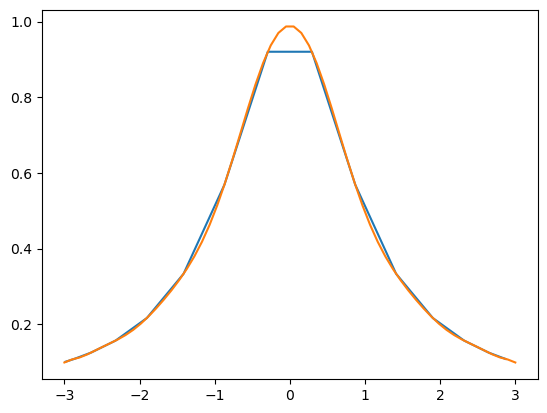

In [124]:
Test_Newton(Interp_Chebyshev, 15, 60,Runge)

### Comparaison d'erreur selon la répartition des points d'interpolation

Nous sommes à présent en mesure de quantifier numériquement la réduction de l'erreur qu'apporte la répartition suivant les points de Chebyshev en comparaison avec les points équirépartis. On introduit pour cela l'erreur
$$
e(n) = \sup_{x\in[-3,3]} |f(x) - p(x)|,
$$
où $f$ est la fonction à interpoler et $p$ est le polynôme d'interpolation de Lagrange de degré $n$. On veut comparer l'évolution de l'erreur en fonction de $n$ et du choix de la répartition des points d'interpolation.

>**À faire :** Écrire une fonction **Erreur_Interp** permettant de calculer l'erreur $e(n)$ dans le cas de points d'interpolation équirépartis et le cas des points de Chebyshev. Cette fonction prendra en entrée l'entier $n$ ainsi qu'un entier $p$ et donnera en sortie un scalaire correspondant à l'erreur $e(n)$ pour les points équirépartis si $p = 0$ ou pour les points de Chebyshev si $p = 1$. L'interpolation se fera à l'aide de la méthode de Newton sur l'intervalle $[-3,3]$.

In [147]:
def Erreur_Interp(n,p):
    m = 5
    if p == 0:
        x = Interp_Equi(-3,3,m*n)
        x_interp = Interp_Equi(-3,3,n)
    else:
        x = Interp_Chebyshev(-3,3,m*n)
        x_interp = Interp_Chebyshev(-3,3,n)
    return np.abs(Runge(x) - Newton(x_interp, x, Runge)).max()
print(Erreur_Interp(10,1))
print(Erreur_Interp(10,0))

1.6112129656837364
0.15440399971357058


>**À faire :** Tracer sur une même figure l'évolution de l'erreur $\log(e(n))$, en fonction de $n$, pour les points d'interpolation équirépartis et pour les points de Chebyshev de $1$ jusqu'à $100$ points.

In [ ]:
n=1000
equi = np.zeros(n)
cheb = np.zeros(n)

for i in range(2,n) :
    equi[i] = Erreur_Interp(i,0)
    cheb[i] = Erreur_Interp(i,1)
plt.plot(np.log(equi), color='blue')
plt.plot(np.log(cheb), color='red')